In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mahesh start
f_df= pd.read_csv('newborn_health_monitoring_with_risk.csv')
print(f_df.head())
print(f_df.info())
print(f_df.describe())
print(f_df.isnull().sum())
print(f_df.duplicated().sum())


  baby_id  name  gender  gestational_age_weeks  birth_weight_kg  \
0    B001  Sara  Female                   40.2              3.3   
1    B001  Sara  Female                   40.2              3.3   
2    B001  Sara  Female                   40.2              3.3   
3    B001  Sara  Female                   40.2              3.3   
4    B001  Sara  Female                   40.2              3.3   

   birth_length_cm  birth_head_circumference_cm        date  age_days  \
0             50.0                         31.9  2024-12-10         1   
1             50.0                         31.9  2024-12-11         2   
2             50.0                         31.9  2024-12-12         3   
3             50.0                         31.9  2024-12-13         4   
4             50.0                         31.9  2024-12-14         5   

   weight_kg  ...  oxygen_saturation   feeding_type  \
0       3.28  ...                 98        Formula   
1       3.35  ...                 99        Form

so I find a data rich csv and tried a pair plot to demonstrate simple relationship and distribution for all data inside.

In [2]:

# drop apgar_score
f_df.drop(columns=['apgar_score'],inplace=True)
# get rid of risk level influence

# drop rows with null values
f_df.dropna(inplace=True)

# reset index
f_df.reset_index(inplace=True,drop=True)
f_df['risk_level'] = f_df['risk_level'].map({'At Risk':1,'Healthy':0})
risk_level = f_df['risk_level']
f_df.drop(columns=['risk_level'],inplace=True)

data_for_analysis = f_df.select_dtypes(include=['number'])
data_for_analysis.dropna(inplace=True)
data_for_analysis.reset_index(inplace=True,drop=True)
print(data_for_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gestational_age_weeks        3000 non-null   float64
 1   birth_weight_kg              3000 non-null   float64
 2   birth_length_cm              3000 non-null   float64
 3   birth_head_circumference_cm  3000 non-null   float64
 4   age_days                     3000 non-null   int64  
 5   weight_kg                    3000 non-null   float64
 6   length_cm                    3000 non-null   float64
 7   head_circumference_cm        3000 non-null   float64
 8   temperature_c                3000 non-null   float64
 9   heart_rate_bpm               3000 non-null   int64  
 10  respiratory_rate_bpm         3000 non-null   int64  
 11  oxygen_saturation            3000 non-null   int64  
 12  feeding_frequency_per_day    3000 non-null   int64  
 13  urine_output_count

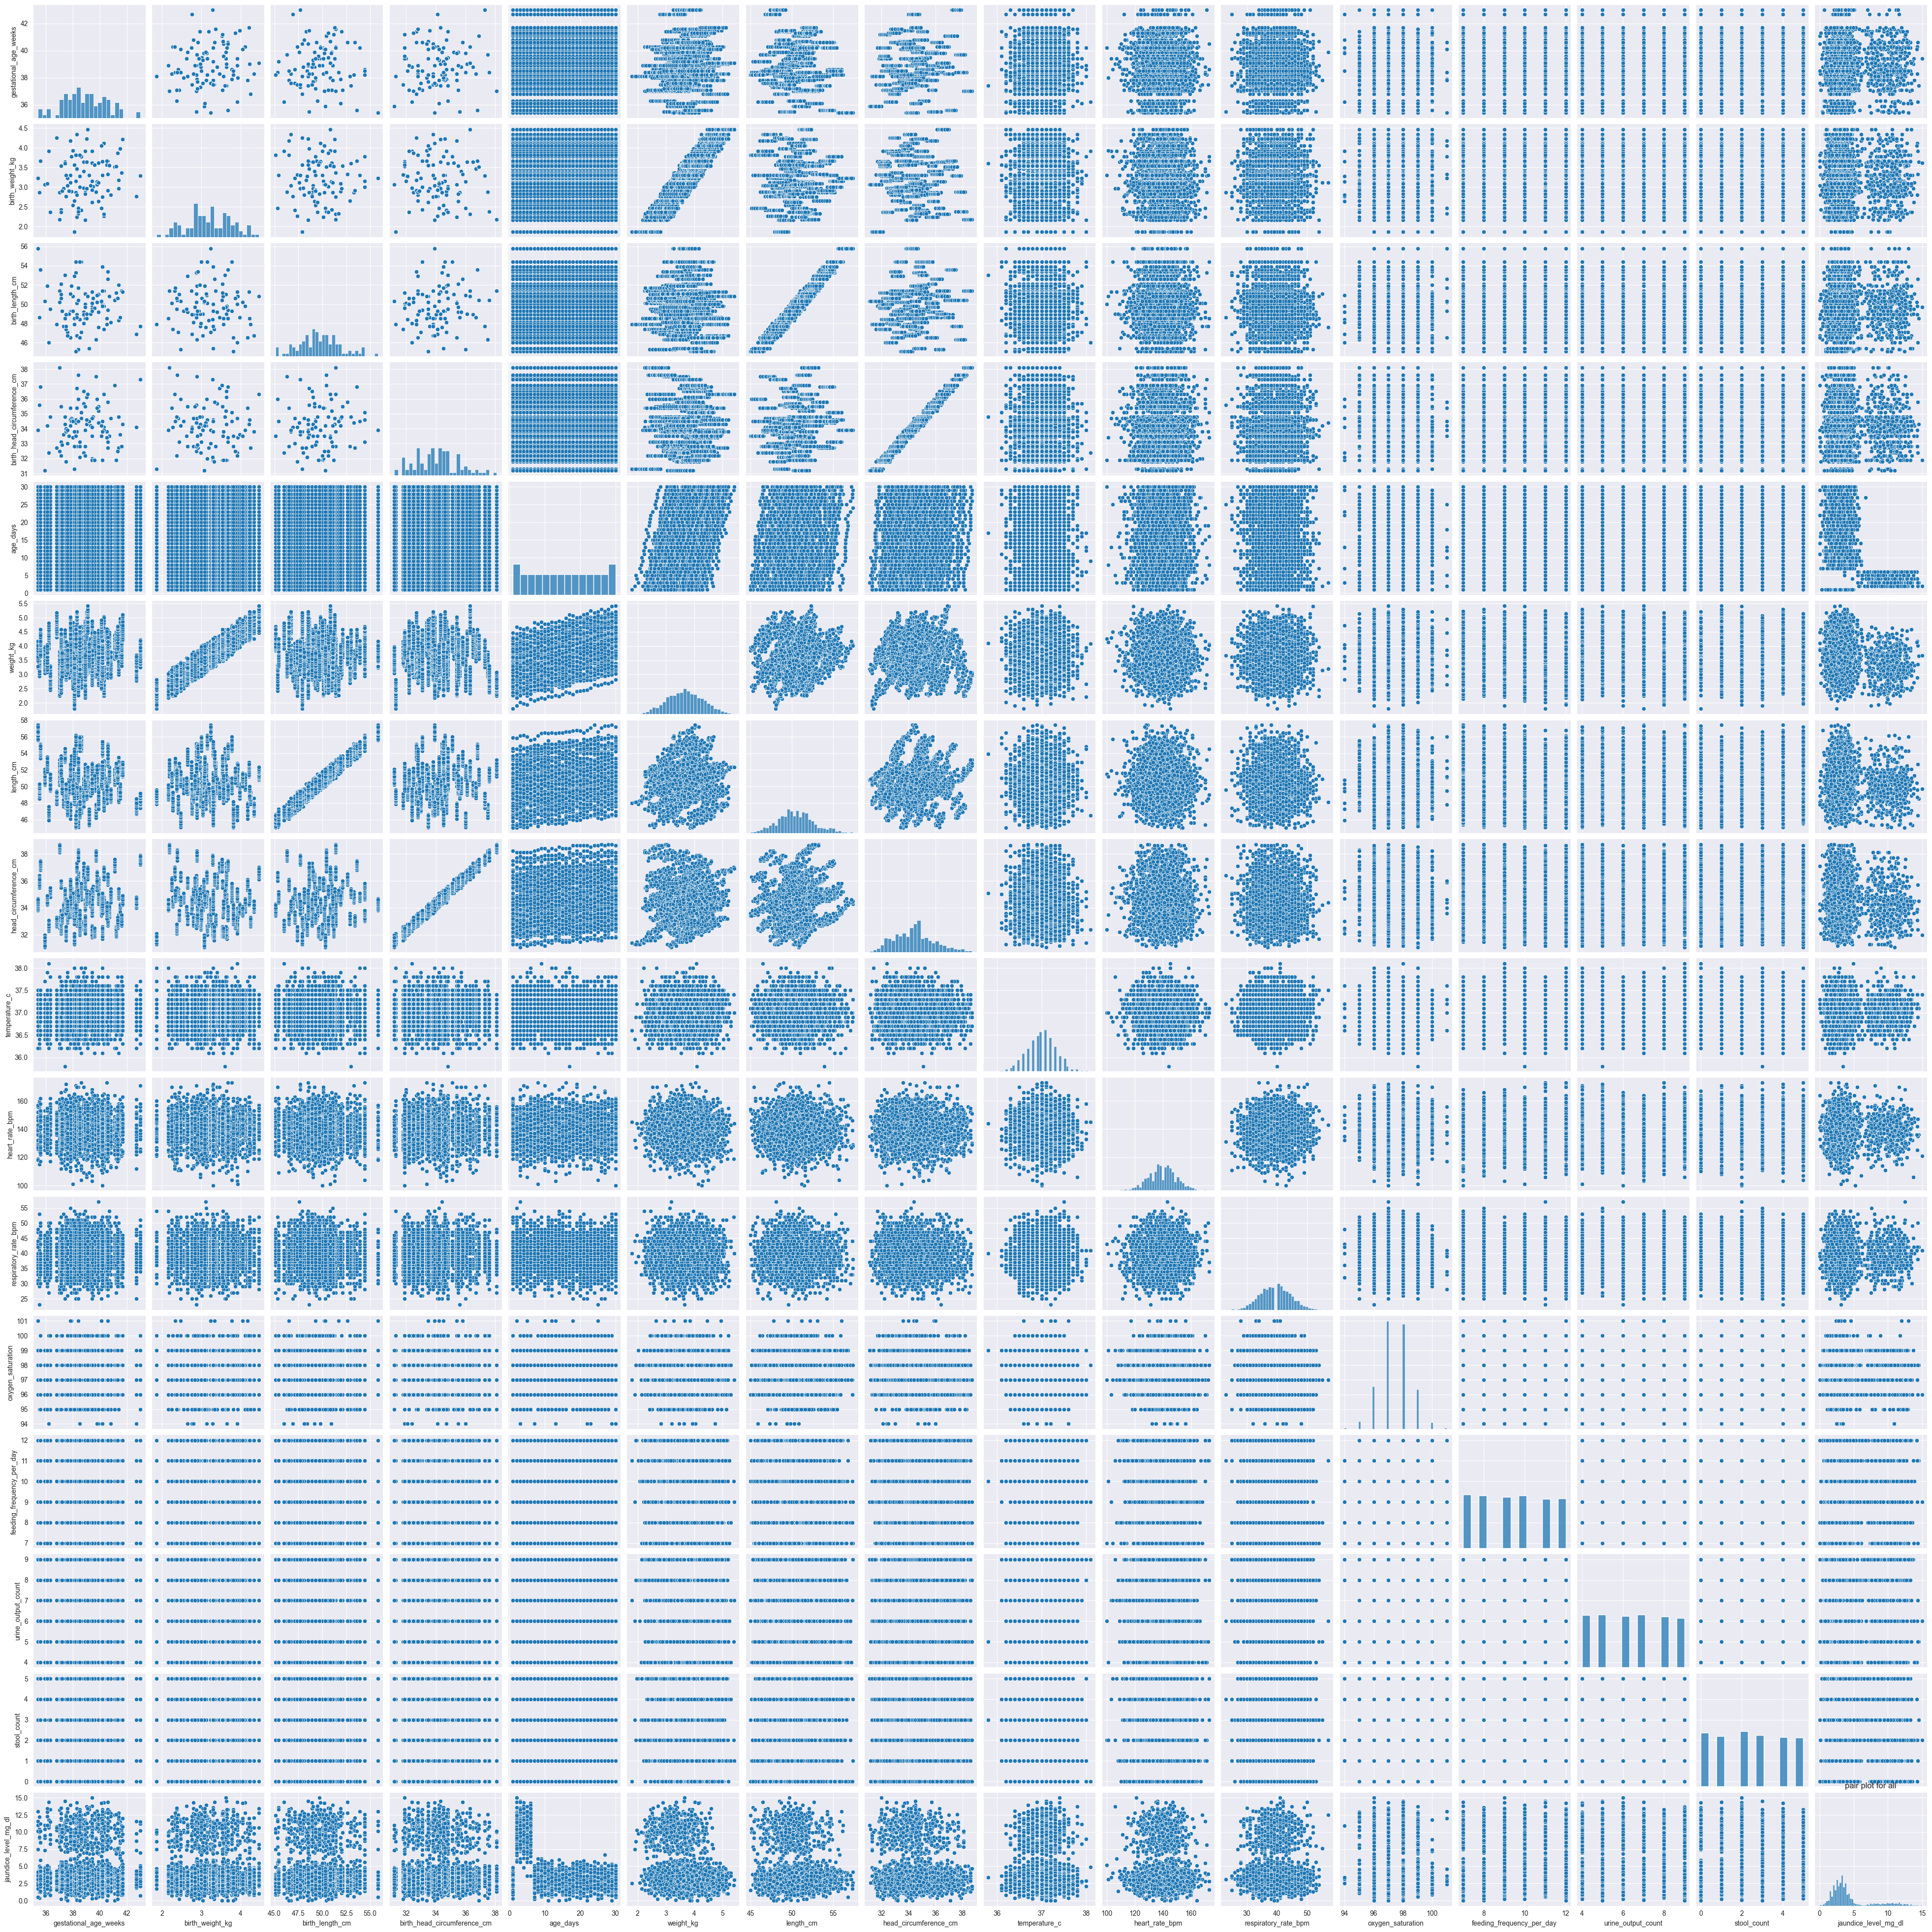

In [3]:

sns.pairplot(data_for_analysis)
plt.title('pair plot for all')
plt.show()

In [4]:
# we need to scale the data help the algorithm not to weight some "big" number data.
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data_for_analysis)
data_minmax_df = pd.DataFrame(data_minmax_scaled, columns=data_for_analysis.columns)

print("\nMinMax Scaling: Range = [0,1]")
print(f"birth_weight_kg - Min: {data_minmax_df['birth_weight_kg'].min():.3f}, Max: {data_minmax_df['birth_weight_kg'].max():.3f}")


MinMax Scaling: Range = [0,1]
birth_weight_kg - Min: 0.000, Max: 1.000


In [5]:
# init PCA and feed data into it
from sklearn.decomposition import PCA
pca = PCA()
pca_results = pca.fit_transform(data_minmax_df)

# Examine explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance by Component:")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.3f} ({explained_variance_ratio[i]*100:.1f}%)")

print(f"\nFirst 3 components explain {cumulative_variance[2]*100:.1f}% of total variance")
print(f"First 5 components explain {cumulative_variance[4]*100:.1f}% of total variance")

# Mahesh end

Explained Variance by Component:
PC1: 0.147 (14.7%)
PC2: 0.141 (14.1%)
PC3: 0.136 (13.6%)
PC4: 0.132 (13.2%)
PC5: 0.107 (10.7%)
PC6: 0.084 (8.4%)
PC7: 0.078 (7.8%)
PC8: 0.049 (4.9%)
PC9: 0.028 (2.8%)
PC10: 0.027 (2.7%)

First 3 components explain 42.4% of total variance
First 5 components explain 66.4% of total variance


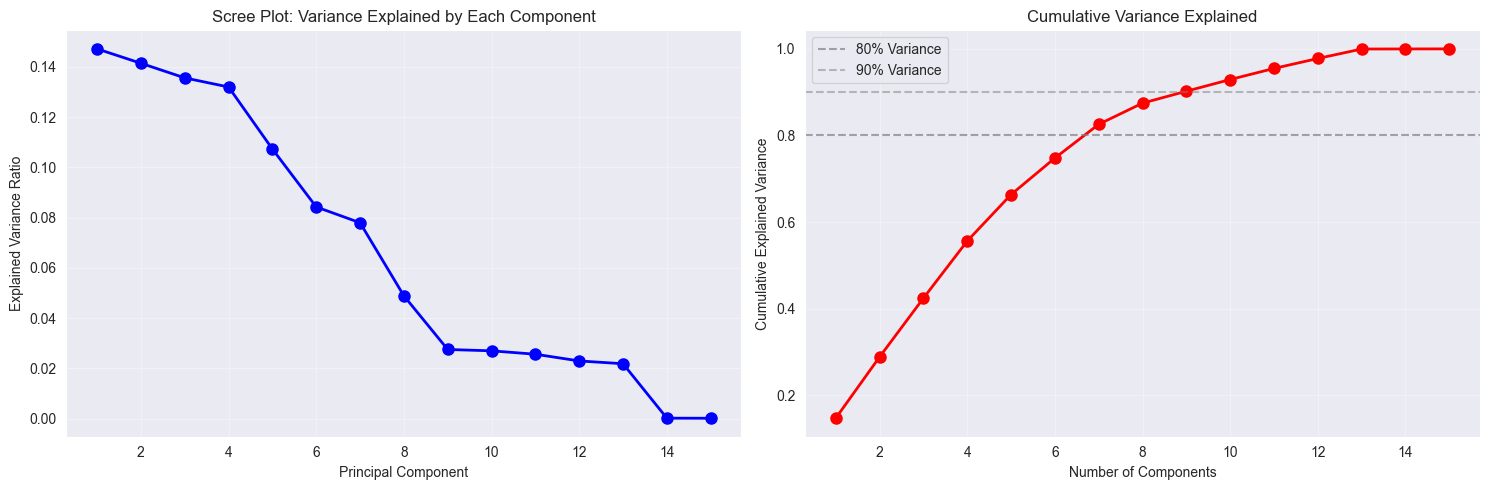

In [6]:
#Hamna start
# Visualize the explained variance

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
ax1.plot(range(1, min(16, len(explained_variance_ratio)+1)),
         explained_variance_ratio[:15], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot: Variance Explained by Each Component')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, min(16, len(cumulative_variance)+1)),
         cumulative_variance[:15], 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7, label='80% Variance')
ax2.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5, label='90% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
components_df = pd.DataFrame(
    pca.components_[:5].T,  # First 5 components
    columns=[f'PC{i+1}' for i in range(5)],
    index=data_for_analysis.columns
)

print("Principal Component Loadings (How much each variable contributes):")
print(components_df.round(3))

Principal Component Loadings (How much each variable contributes):
                               PC1    PC2    PC3    PC4    PC5
gestational_age_weeks       -0.006  0.032  0.008  0.047 -0.032
birth_weight_kg             -0.047  0.007 -0.042  0.136 -0.310
birth_length_cm             -0.044 -0.029 -0.005  0.048  0.238
birth_head_circumference_cm -0.055 -0.043  0.049  0.047  0.636
age_days                    -0.439 -0.190 -0.118  0.676 -0.049
weight_kg                   -0.140 -0.040 -0.058  0.261 -0.235
length_cm                   -0.090 -0.047 -0.019  0.120  0.201
head_circumference_cm       -0.085 -0.054  0.036  0.094  0.576
temperature_c               -0.002 -0.006  0.006 -0.006 -0.001
heart_rate_bpm               0.003 -0.005  0.002  0.003  0.017
respiratory_rate_bpm        -0.008 -0.011 -0.006 -0.002 -0.009
oxygen_saturation           -0.011 -0.008 -0.000 -0.009 -0.009
feeding_frequency_per_day    0.686 -0.207  0.513  0.472 -0.015
urine_output_count           0.321  0.768 -0.427  0

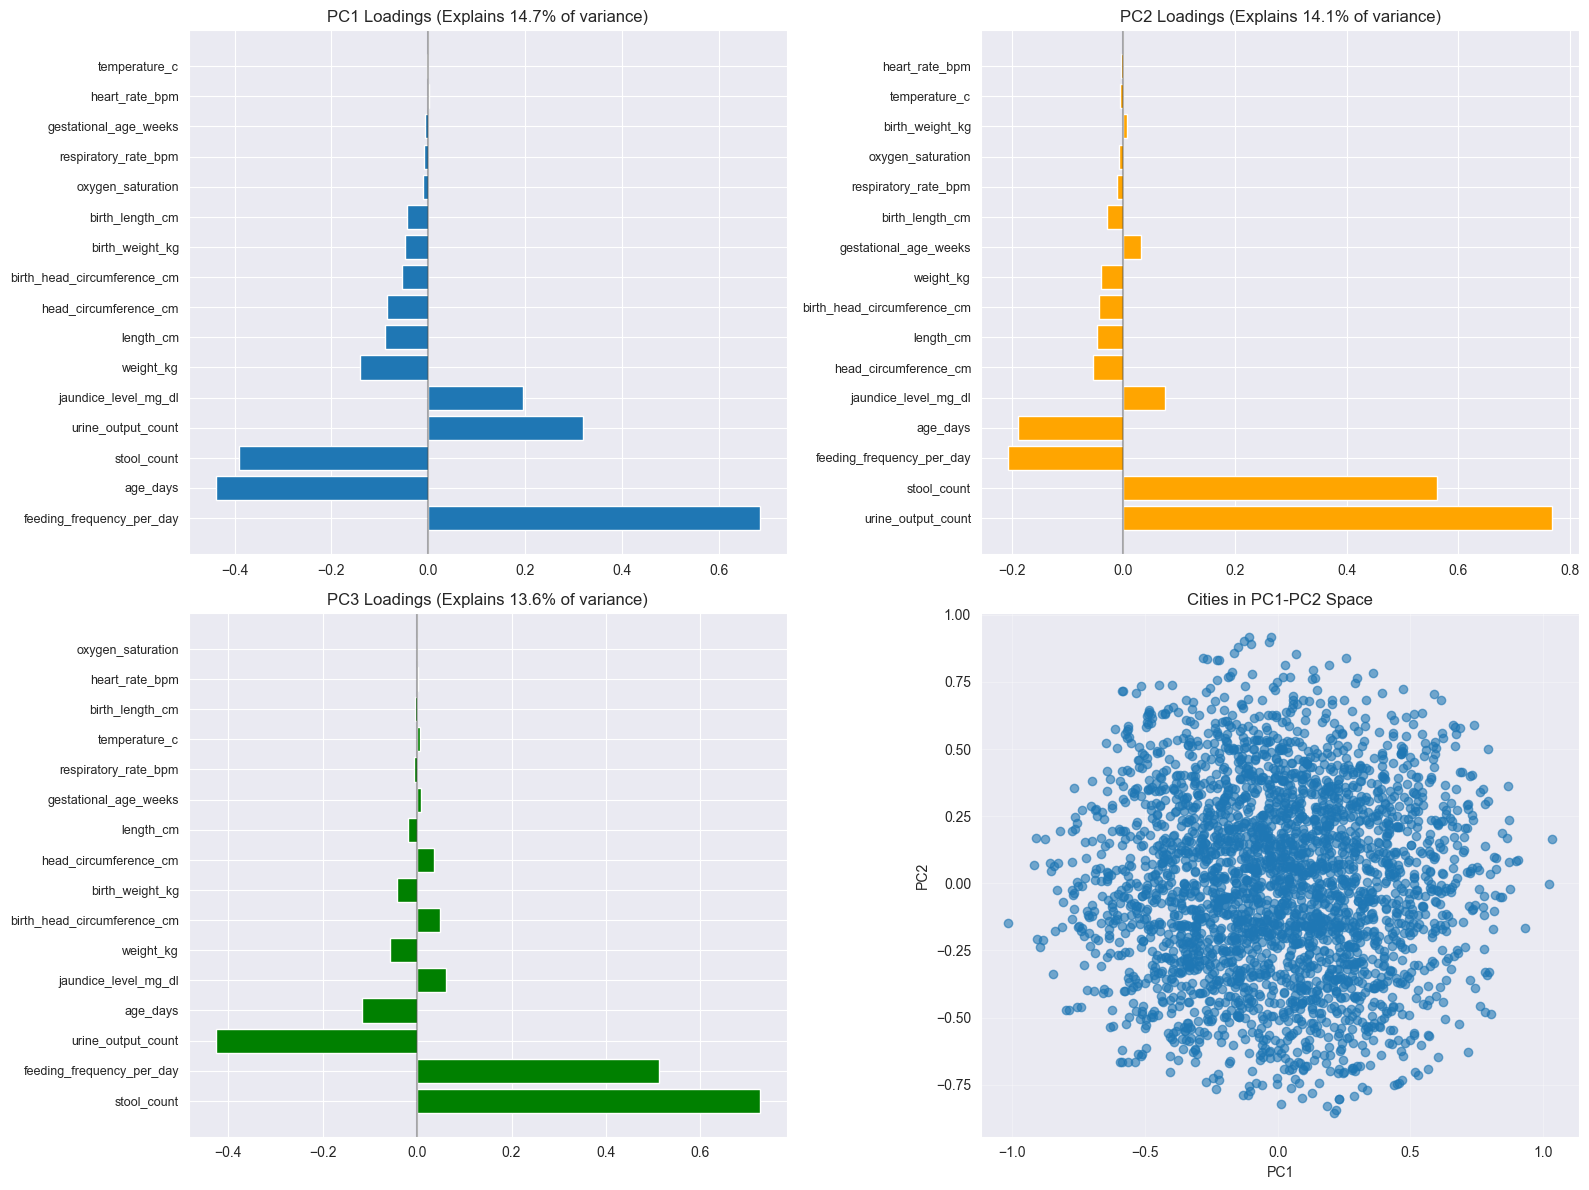

In [8]:
# Visualize component loadings for interpretation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PC1 loadings
pc1_loadings = components_df['PC1'].sort_values(key=abs, ascending=False)
axes[0,0].barh(range(len(pc1_loadings)), pc1_loadings.values)
axes[0,0].set_yticks(range(len(pc1_loadings)))
axes[0,0].set_yticklabels(pc1_loadings.index, fontsize=9)
axes[0,0].set_title(f'PC1 Loadings (Explains {explained_variance_ratio[0]*100:.1f}% of variance)')
axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# PC2 loadings
pc2_loadings = components_df['PC2'].sort_values(key=abs, ascending=False)
axes[0,1].barh(range(len(pc2_loadings)), pc2_loadings.values, color='orange')
axes[0,1].set_yticks(range(len(pc2_loadings)))
axes[0,1].set_yticklabels(pc2_loadings.index, fontsize=9)
axes[0,1].set_title(f'PC2 Loadings (Explains {explained_variance_ratio[1]*100:.1f}% of variance)')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# PC3 loadings
pc3_loadings = components_df['PC3'].sort_values(key=abs, ascending=False)
axes[1,0].barh(range(len(pc3_loadings)), pc3_loadings.values, color='green')
axes[1,0].set_yticks(range(len(pc3_loadings)))
axes[1,0].set_yticklabels(pc3_loadings.index, fontsize=9)
axes[1,0].set_title(f'PC3 Loadings (Explains {explained_variance_ratio[2]*100:.1f}% of variance)')
axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# PC1 vs PC2 scatter plot of cities
axes[1,1].scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.6)
axes[1,1].set_xlabel('PC1')
axes[1,1].set_ylabel('PC2')
axes[1,1].set_title('Cities in PC1-PC2 Space') #TODO 
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Business interpretation of components
print("CLINICAL INTERPRETATION:")
print("="*50)

# Helper to list high-magnitude loadings
def strong_loadings(df, pc_col, thr=0.20):
    pos = df[pc_col][df[pc_col] >  thr].sort_values(ascending=False)
    neg = df[pc_col][df[pc_col] < -thr].sort_values()
    return list(pos.index), list(neg.index)

# PC1
pc1_pos, pc1_neg = strong_loadings(components_df, 'PC1', thr=0.20)
print(f"PC1 (explains {explained_variance_ratio[0]*100:.1f}% of variance):")
print("High positive loadings (higher PC1 scores):", pc1_pos)
print("High negative loadings (lower PC1 scores):", pc1_neg)


# PC2
pc2_pos, pc2_neg = strong_loadings(components_df, 'PC2', thr=0.20)
print(f"PC2 (explains {explained_variance_ratio[1]*100:.1f}% of variance):")
print("High positive loadings (higher PC2 scores):", pc2_pos)
print("High negative loadings (lower PC2 scores):", pc2_neg)



CLINICAL INTERPRETATION:
PC1 (explains 14.7% of variance):
High positive loadings (higher PC1 scores): ['feeding_frequency_per_day', 'urine_output_count']
High negative loadings (lower PC1 scores): ['age_days', 'stool_count']
PC2 (explains 14.1% of variance):
High positive loadings (higher PC2 scores): ['urine_output_count', 'stool_count']
High negative loadings (lower PC2 scores): ['feeding_frequency_per_day']


'''
High PC1 → “intake-heavy, early-stage pattern.”
Younger infants tending to feed more frequently, producing more urine but fewer stools (GI transit not fully established yet).

Low PC1 → “maturing GI pattern.”
Older infants with less frequent feeds and more stools (consolidating feeds; GI motility/output more established).

Clinical uses (signals to check):

High PC1: verify effective latch/transfer, monitor weight trajectory and jaundice (frequent feeds can be compensatory).

Low PC1: ensure adequate intake despite fewer feeds; stools are reassuring—cross-check hydration and voiding trend.
'''

In [10]:
# Create a dataframe with PCA results for easier analysis (first 3 PCs)
pca_df = pd.DataFrame(pca_results[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Attach key clinical fields for profiling (keep only those that exist)
attach_cols = [
    'age_days', 'jaundice_level_mg_dl', 'feeding_frequency_per_day',
    'stool_count', 'urine_output_count', 'weight_kg', 'length_cm',
    'head_circumference_cm', 'oxygen_saturation', 'temperature_c',
    'heart_rate_bpm', 'respiratory_rate_bpm'
]
attach_cols = [c for c in attach_cols if c in data_for_analysis.columns]
pca_df = pd.concat([pca_df, data_for_analysis[attach_cols]], axis=1)

def evr_str(i):
    try:
        return f" (explains {explained_variance_ratio[i-1]*100:.1f}% of variance)"
    except Exception:
        return ""

def safe_cols(candidates):
    """Return only columns present in pca_df, keeping order."""
    return [c for c in candidates if c in pca_df.columns]

print("RECORDS AT EXTREMES OF EACH PCA DIMENSION:")
print("="*60)

# ---------- PC1: Feeding/diuresis in younger infants (↑feeds, ↑urine; ↓age, ↓stools) ----------
cols_pc1 = safe_cols([
    'feeding_frequency_per_day', 'urine_output_count',
    'stool_count', 'age_days', 'jaundice_level_mg_dl', 'weight_kg', 'PC1'
])

print(f"\nPC1{evr_str(1)} - Highest  (↑feeds, ↑urine; typically younger & fewer stools):")
print(pca_df.nlargest(5, 'PC1')[cols_pc1].to_string(index=False))

print(f"\nPC1{evr_str(1)} - Lowest   (maturing GI pattern: fewer feeds, more stools, older):")
print(pca_df.nsmallest(5, 'PC1')[cols_pc1].to_string(index=False))

# ---------- PC2: High-output efficiency (↑urine, ↑stools; ↓feeding frequency) ----------
cols_pc2 = safe_cols([
    'urine_output_count', 'stool_count',
    'feeding_frequency_per_day', 'age_days', 'jaundice_level_mg_dl', 'PC2'
])

print(f"\nPC2{evr_str(2)} - Highest  (↑urine & ↑stools with fewer feeds: efficient/larger feeds):")
print(pca_df.nlargest(5, 'PC2')[cols_pc2].to_string(index=False))

print(f"\nPC2{evr_str(2)} - Lowest   (high-frequency, low-output pattern):")
print(pca_df.nsmallest(5, 'PC2')[cols_pc2].to_string(index=False))

# ---------- PC3: Stool-dominant maturation (↑stools, ↑feeding, ↑age; ↓jaundice) ----------
cols_pc3 = safe_cols([
    'stool_count', 'feeding_frequency_per_day', 'age_days',
    'urine_output_count', 'jaundice_level_mg_dl', 'PC3'
])

print(f"\nPC3{evr_str(3)} - Highest  (stool-dominant maturation with active feeding/older age):")
print(pca_df.nlargest(5, 'PC3')[cols_pc3].to_string(index=False))

print(f"\nPC3{evr_str(3)} - Lowest   (lower stools/feeding; check intake & hydration):")
print(pca_df.nsmallest(5, 'PC3')[cols_pc3].to_string(index=False))

# Hamna end

RECORDS AT EXTREMES OF EACH PCA DIMENSION:

PC1 (explains 14.7% of variance) - Highest  (↑feeds, ↑urine; typically younger & fewer stools):
 feeding_frequency_per_day  urine_output_count  stool_count  age_days  jaundice_level_mg_dl  weight_kg      PC1
                        12                   9            0         4                  11.8       3.89 1.034181
                        12                   8            0         2                  11.8       2.53 1.022539
                        12                   7            0         5                  11.8       2.25 0.932658
                        12                   9            0         2                   8.0       3.40 0.907324
                        12                   9            0         6                   8.5       3.21 0.899873

PC1 (explains 14.7% of variance) - Lowest   (maturing GI pattern: fewer feeds, more stools, older):
 feeding_frequency_per_day  urine_output_count  stool_count  age_days  jaundice_level_m

Final PCA Interpretation (based on your extremes & medians)
PC1 — Early intake vs. GI maturation (14.7%)

High PC1 (≈top 10%): feeds 12/day, urine 8/day, stools 0–1/day, age ~6 d, bilirubin ↑ (~4.9 mg/dL), weight lower (~3.34 kg).
→ Early-stage, intake-heavy pattern with diuresis before stooling is established. Priorities: confirm effective transfer/volume, monitor hydration & bilirubin.

Low PC1 (≈bottom 10%): feeds 7/day, urine 5/day, stools 4–5/day, age ~25–30 d, bilirubin low (~3.0), weight higher (~4.0 kg).
→ Maturing GI profile: consolidated feeds, stable stooling; generally reassuring.

Delta (High – Low): age −19 d, bilirubin +1.9, feeds +5/day, stools −3/day, urine +3/day, weight −0.66 kg.
Read: Early group is younger, feeds much more often, pees more, stools less, and has higher bilirubin.

PC2 — Output efficiency vs. high-freq/low-output (14.1%)

High PC2 (≈top 10%): urine 9/day + stools 4/day with feeds 9/day, age ~11 d, bilirubin ~3.6.
→ Efficient/larger feeds per session—good outputs despite fewer feeds. Confirm weight gain; if stools excessive, rule out diarrhea.

Low PC2 (≈bottom 10%): feeds 10/day but urine 4/day, stools 0/day, age ~21 d, bilirubin ~3.1.
→ High-frequency, low-output pattern—flag for ineffective transfer/insufficient volume; prioritize latch/volume assessment and hydration checks.

Delta: urine +5/day, stools +4/day, feeds −1/day (High vs Low).
Read: High PC2 = more output with fewer feeds (efficient). Low PC2 = frequent but not productive.

PC3 — Stool-dominant activation vs. low-stool pattern (13.6%)

High PC3 (≈top 10%): stools 5/day, feeds 11–12/day, age ~11.5 d, urine 5/day, bilirubin ~3.5.
→ Stool activation early with active feeding—reassuring if weight/hydration stable.

Low PC3 (≈bottom 10%): stools 0/day, feeds 7–8/day, age ~17–28 d, urine 8–9/day.
→ Low stooling despite adequate voids—review intake/transfer, consider slow transit/constipation contextually.

Delta: stools +5/day, feeds +3/day, urine −3/day (High vs Low).
Read: PC3 isolates the stool dimension separate from urine.

PC1 × PC2 Phenotypes (your plot)

Early-intake & High-output (Q1): young, efficient early feeders—track weight; screen stool quality.

Very-frequent, Low-output (Q4): highest concern—many feeds with low urine/stools; prioritize feeding effectiveness & hydration checks.

Mature & Efficient-output (Q2): fewer feeds with robust urine/stools—reassuring.

Low-feed & Low-output (Q3): fewer feeds and low outputs—review intake plan and follow up closely.

Most records are “Middle,” indicating a continuum rather than hard clusters—use PCs to triage attention, not to assign diagnoses.

Practical actions

Daily monitoring bundle: weight delta (%/day), void/stool counts, bilirubin trend (for high PC1).

Targeted review:

High PC1 & Low PC2 → bedside latch/transfer assessment first.

Low PC3 (no stools) → intake review; consider stool softening strategies if clinically indicated.

    

But it is an unsupervised machine learning, we don't have to have the knowledge of that field, yet we can still have some insight from this result.

Now we can combine the PC1\PC2 result with the risk_level label, to figure out if the PCA DO find something useful insight.

risk_level value counts:
 risk_level
0    2602
1     398
Name: count, dtype: int64


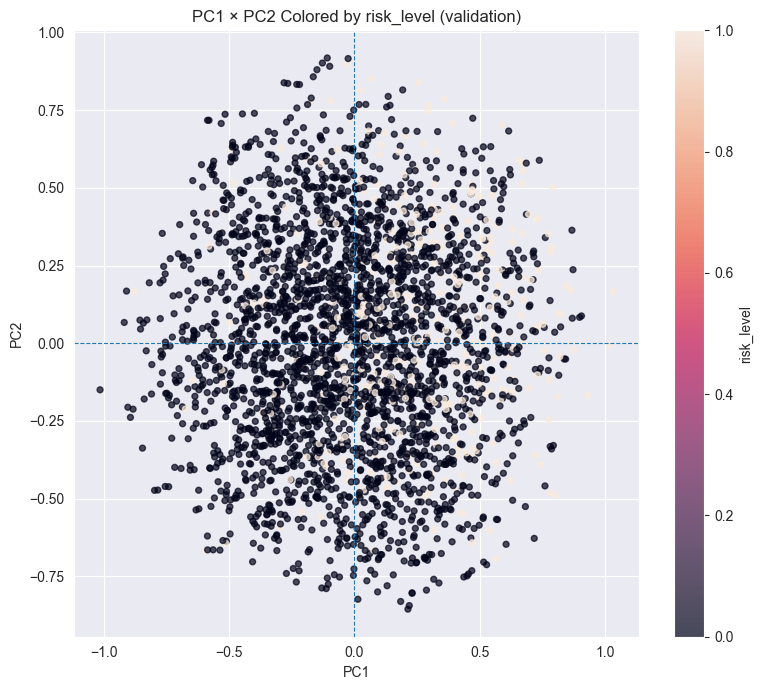

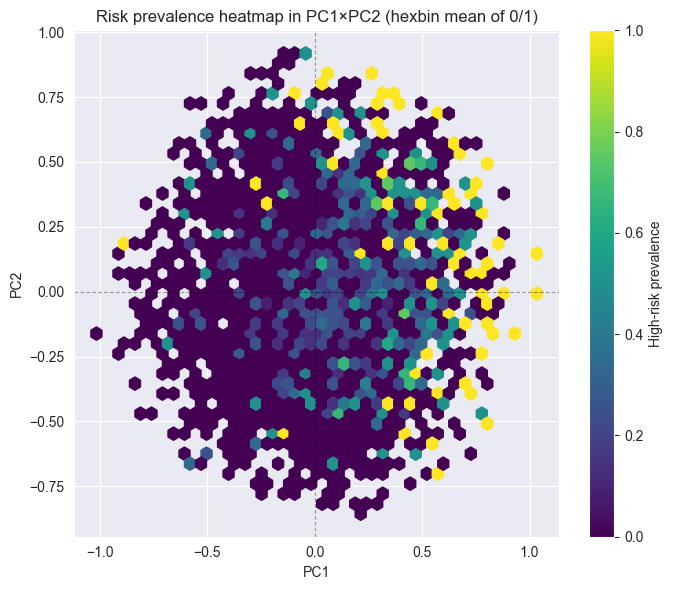

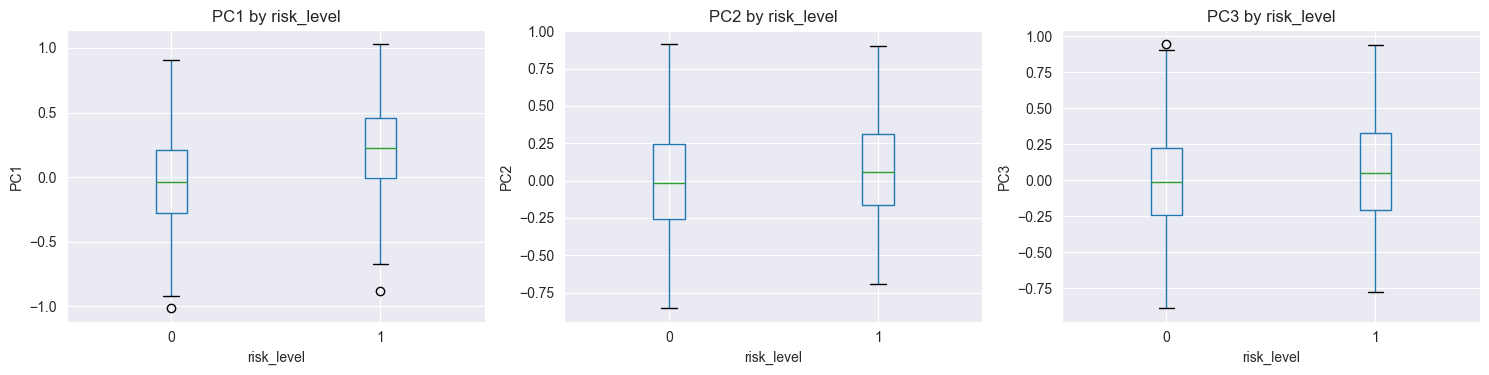

In [11]:
# Chenghao start
# === Reuse risk_level JUST FOR VALIDATION ===
# 1) Attach risk_level (must be same length/order as pca_df)
#    risk_level_series should be a pandas Series aligned to your rows
pca_df = pca_df.copy()
pca_df['risk_level'] = risk_level.values  # replace with your variable name



# Basic sanity
print("risk_level value counts:\n", pca_df['risk_level'].value_counts(dropna=False))

# Determine binary vs multiclass
classes = sorted(pca_df['risk_level'].dropna().unique())
is_binary = (len(classes) == 2)

# 2) Scatter: PC1 × PC2 colored by risk_level
plt.figure(figsize=(8,7))
plt.scatter(pca_df['PC1'], pca_df['PC2'],
            c=pca_df['risk_level'], s=18, alpha=0.7)
plt.axvline(0, lw=0.8, ls='--')
plt.axhline(0, lw=0.8, ls='--')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PC1 × PC2 Colored by risk_level (validation)')
cbar = plt.colorbar()
cbar.set_label('risk_level')
plt.tight_layout()
plt.show()

# now we make a hexbin plot 

df = pca_df.dropna(subset=['PC1','PC2','risk_level']).copy()
x = df['PC1'].values
y = df['PC2'].values
z = df['risk_level'].values   # 0/1 -> mean = prevalence


plt.figure(figsize=(7,6))
hb = plt.hexbin(
    x, y,
    C=z,                               # aggregate target is z, 
    reduce_C_function=np.mean,         # average risk in each hex, what function we use to aggregate the number in each cell, and aggreate the c value, which is risk level
    gridsize=40,                       # adjust hex size
    mincnt=1,                          # keep cells with ≥1 point, each cell should have at least data
    cmap='viridis',
    vmin=0, vmax=1 # min and maximum value
)
plt.colorbar(hb, label='High-risk prevalence')
plt.axvline(0, lw=0.8, ls='--', color='k', alpha=0.4)
plt.axhline(0, lw=0.8, ls='--', color='k', alpha=0.4)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('Risk prevalence heatmap in PC1×PC2 (hexbin mean of 0/1)')
plt.tight_layout(); plt.show()

# 3) Boxplots: PCs by risk_level distribution in a box plot
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, pc in zip(axes, ['PC1','PC2','PC3']):
    pca_df.boxplot(column=pc, by='risk_level', ax=ax)
    ax.set_title(f'{pc} by risk_level')
    ax.set_xlabel('risk_level'); ax.set_ylabel(pc)
fig.suptitle(''); plt.tight_layout(); plt.show()





→ Risk rises as pca data move toward the early-intake end (High PC1) and the high-output efficiency end (High PC2), consistent with your phenotypes.

📊 Finding Optimal Number of Clusters...


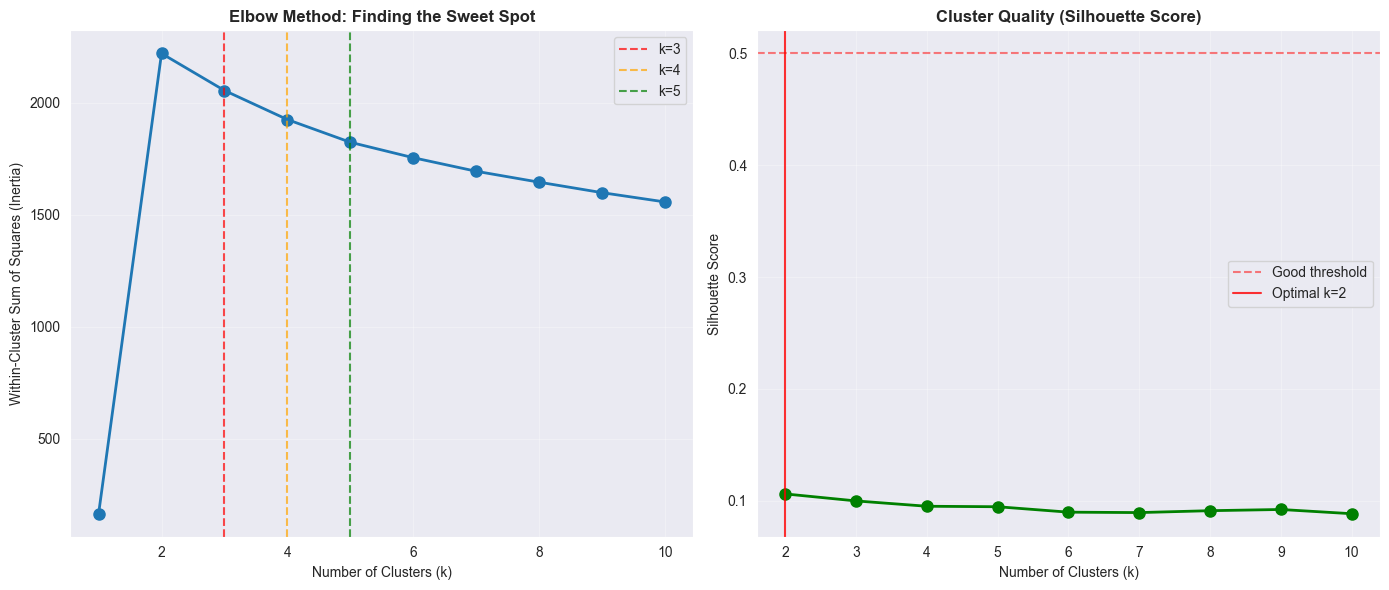

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

cluster_range = range(1, 11)
inertias = []
silhouette_scores = []

print("📊 Finding Optimal Number of Clusters...")

for k in cluster_range:
    if k == 1:
        inertias.append(np.sum(data_minmax_scaled.var() * len(data_minmax_scaled)))
        silhouette_scores.append(0)  # Can't calculate silhouette for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data_minmax_scaled)
        inertias.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data_minmax_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Elbow plot
ax1.plot(cluster_range, inertias, 'o-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method: Finding the Sweet Spot', fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (Inertia)')
ax1.grid(True, alpha=0.3)

# Highlight potential elbow points
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3')
ax1.axvline(x=4, color='orange', linestyle='--', alpha=0.7, label='k=4')
ax1.axvline(x=5, color='green', linestyle='--', alpha=0.7, label='k=5')
ax1.legend()

# Silhouette plot
ax2.plot(cluster_range[1:], silhouette_scores[1:], 'o-', color='green', linewidth=2, markersize=8)
ax2.set_title('Cluster Quality (Silhouette Score)', fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Good threshold')
ax2.legend()

# Find optimal k by silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores[1:]) + 1]  # +1 because we skip k=1
ax2.axvline(x=optimal_k, color='red', linestyle='-', alpha=0.8, label=f'Optimal k={optimal_k}')
ax2.legend()

plt.tight_layout()
plt.show()


Silhouette by K (higher is better):
method  kmeans   ward
K                    
2        0.250  0.227
3        0.243  0.199
4        0.257  0.210
5        0.256  0.194
6        0.277  0.193
7        0.271  0.198
8        0.267  0.195

Selected → KMEANS with K=6 (silhouette=0.277) on 3 PCs: ['PC1', 'PC2', 'PC3']

Silhouette summary by cluster:
         count   mean  median    min    max
cluster                                    
0          442  0.289   0.306 -0.006  0.556
1          506  0.312   0.311  0.009  0.565
2          515  0.282   0.269  0.006  0.548
3          519  0.281   0.262 -0.009  0.554
4          474  0.232   0.228 -0.048  0.542
5          544  0.267   0.262 -0.017  0.537

Cluster median profiles (clinical + PCs):
         age_days  jaundice_level_mg_dl  feeding_frequency_per_day  stool_count  urine_output_count  weight_kg  length_cm  head_circumference_cm  temperature_c  heart_rate_bpm  respiratory_rate_bpm   PC1   PC2   PC3
cluster                                     

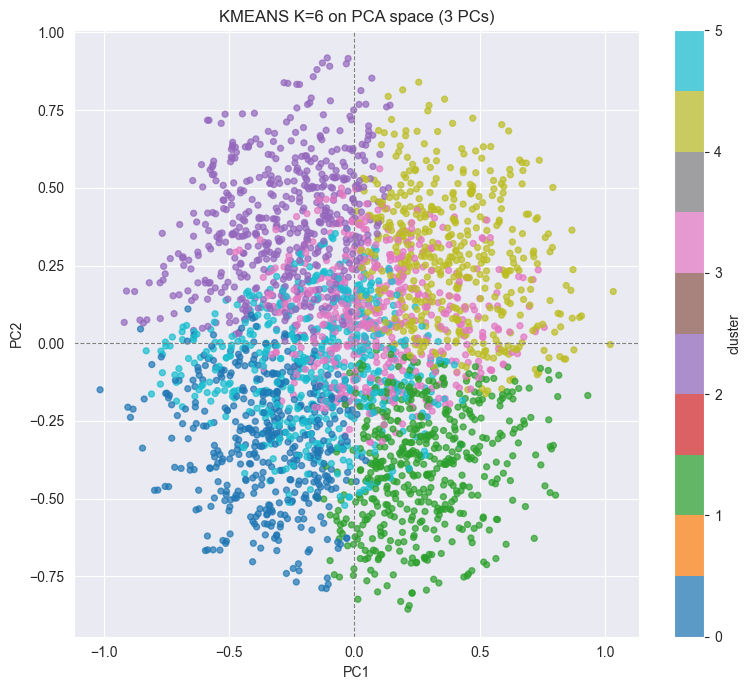


Post-hoc risk by cluster (validation only):
         count  risk_rate
cluster                  
0          442      0.054
1          506      0.142
2          515      0.072
3          519      0.137
4          474      0.270
5          544      0.121


In [13]:
# --- Cluster on PCA scores (risk-free) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples


# 1) Choose how many PCs to use
cum_target = 0.85  # use PCs until >=85% variance, capped at 6
try:
    evr = np.asarray(explained_variance_ratio)
    cum = evr.cumsum()
    n_pc = min(int(np.searchsorted(cum, cum_target) + 1), min(6, (pca_df.filter(like='PC').shape[1])))
except Exception:
    n_pc = min(3, pca_df.filter(like='PC').shape[1])

pc_cols = [f'PC{i}' for i in range(1, n_pc+1)]

# 2) Scale PC scores (keeps axes comparable)
X = StandardScaler().fit_transform(pca_df[pc_cols].values)

# 3) Model selection: K=2..8 for K-means and Ward
rows = []
best = {'method': None, 'K': None, 'sil': -1, 'labels': None}
for K in range(2, 9):
    # K-means
    km = KMeans(n_clusters=K, n_init=50, random_state=42)
    lab_km = km.fit_predict(X)
    sil_km = silhouette_score(X, lab_km)
    rows.append(['kmeans', K, sil_km])
    if sil_km > best['sil']:
        best.update({'method':'kmeans','K':K,'sil':sil_km,'labels':lab_km,'model':km})

    # Ward hierarchical
    ag = AgglomerativeClustering(n_clusters=K, linkage='ward')
    lab_wd = ag.fit_predict(X)
    sil_wd = silhouette_score(X, lab_wd)
    rows.append(['ward', K, sil_wd])
    if sil_wd > best['sil']:
        best.update({'method':'ward','K':K,'sil':sil_wd,'labels':lab_wd,'model':ag})

sel_df = pd.DataFrame(rows, columns=['method','K','silhouette']).pivot(index='K', columns='method', values='silhouette')
print("Silhouette by K (higher is better):")
print(sel_df.round(3).to_string())

print(f"\nSelected → {best['method'].upper()} with K={best['K']} (silhouette={best['sil']:.3f}) "
      f"on {n_pc} PCs: {pc_cols}")

# 4) Attach labels
pca_df['cluster'] = best['labels']

# 5) Internal quality details
sil_vals = silhouette_samples(X, pca_df['cluster'].values)
sil_summary = (pd.DataFrame({'cluster': pca_df['cluster'], 'sil': sil_vals})
               .groupby('cluster')['sil'].agg(['count','mean','median','min','max']).round(3))
print("\nSilhouette summary by cluster:")
print(sil_summary.to_string())

# 6) Clinical profiling (medians)
clinical_cols = [
    'age_days','jaundice_level_mg_dl','feeding_frequency_per_day','stool_count','urine_output_count',
    'weight_kg','length_cm','head_circumference_cm','temperature_c','heart_rate_bpm','respiratory_rate_bpm'
]
clinical_cols = [c for c in clinical_cols if c in pca_df.columns]
if clinical_cols:
    prof = pca_df.groupby('cluster')[clinical_cols + pc_cols].median().round(2)
    print("\nCluster median profiles (clinical + PCs):")
    print(prof.to_string())

# 7) Simple visuals (PC1 vs PC2; if you used >2 PCs, this is just a slice)
plt.figure(figsize=(8,7))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], s=18, alpha=0.7, cmap='tab10')
plt.axvline(0, ls='--', lw=0.8, color='grey'); plt.axhline(0, ls='--', lw=0.8, color='grey')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'{best["method"].upper()} K={best["K"]} on PCA space ({n_pc} PCs)')
plt.colorbar(sc, label='cluster'); plt.tight_layout(); plt.show()

# 8) (Optional) post-hoc risk validation (no leakage)
try:
      # check existence
    rb = pca_df.assign(risk=risk_level).groupby('cluster')['risk'].agg(['count','mean']).rename(columns={'mean':'risk_rate'}).round(3)
    print("\nPost-hoc risk by cluster (validation only):")
    print(rb.to_string())
except NameError:
    pass
# Chenghao end

Overall baseline risk = 13.26%  (= total expected positives / total population)

 cluster  count risk_rate  lift share_of_highrisk
       0    442      5.4%  0.41              6.0%
       1    506     14.2%  1.07             18.1%
       2    515      7.2%  0.54              9.3%
       3    519     13.7%  1.03             17.9%
       4    474     27.0%  2.04             32.2%
       5    544     12.1%  0.91             16.6%
Interpretation: Cluster 4 is  prime segment for attention—it contains ~15.8% of the population but ~32% of all high-risk cases (big concentration).

Cluster 0 looks de-prioritizable.

What to do with it

Operational triage (simple rule):

High priority: all infants in Cluster 4.

Medium priority: Clusters 1 & 3.

Low priority: Clusters 0 & 2 (monitor, but fewer alerts).

Neutral: Cluster 5 (near baseline).

In [14]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# Make a copy and ensure cluster is categorical for a clean legend
df3d = pca_df.copy()
df3d['cluster'] = df3d['cluster'].astype(str)

# Interactive 3D scatter colored by cluster
hover_cols = [
    'age_days','jaundice_level_mg_dl','feeding_frequency_per_day','stool_count','urine_output_count',
    'weight_kg','length_cm','head_circumference_cm','temperature_c','heart_rate_bpm','respiratory_rate_bpm'
]
hover_cols = [c for c in hover_cols if c in df3d.columns]

fig = px.scatter_3d(
    df3d,
    x='PC1', y='PC2', z='PC3',
    color='cluster',
    hover_data=hover_cols,
    opacity=0.85,
    title=f'Clusters in PCA space — {best["method"].upper()} (K={best["K"]})'
)
fig.update_traces(marker=dict(size=3))

# Optional: overlay K-means centroids (back-transformed into PC units)
try:
    if best['method'] == 'kmeans':
        # Refit a scaler on the same PCs used for clustering
        # If you used dynamic number of PCs, replace ['PC1','PC2','PC3'] with your pc_cols
        scaler_pc = StandardScaler().fit(pca_df[['PC1','PC2','PC3']].values)
        centers_pc = scaler_pc.inverse_transform(best['model'].cluster_centers_)

        fig.add_trace(go.Scatter3d(
            x=centers_pc[:,0], y=centers_pc[:,1], z=centers_pc[:,2],
            mode='markers+text',
            marker=dict(size=8, color='black'),
            text=[f'C{i}' for i in range(centers_pc.shape[0])],
            textposition='top center',
            name='Centroids'
        ))
except Exception:
    pass

fig.update_layout(
    width=900, height=700,
    legend_title_text='cluster',
    scene=dict(
        xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'
    )
)

# If nothing shows in your environment, set a renderer:
# import plotly.io as pio; pio.renderers.default = "browser"  # or "plotly_mimetype" in JupyterLab

fig.show()

In [15]:
print(centers_pc)

[[-0.34714258 -0.31576621 -0.18030355]
 [ 0.27454847 -0.3909241   0.01439008]
 [-0.27740328  0.39154372 -0.00882747]
 [ 0.10259807  0.08675806 -0.4449509 ]
 [ 0.38990845  0.27194627  0.14958572]
 [-0.14772685 -0.0686819   0.43423631]]


In [31]:
print(df3d)
df3d.to_csv('df3d.csv',index=False)
centers_df = pd.DataFrame(centers_pc, columns=pc_cols)
centers_df.insert(0, 'cluster', [f'C{i}' for i in range(centers_df.shape[0])])
print(centers_df)
centers_df.to_csv('kmeans_centroids_in_PC_space.csv', index=False)


           PC1       PC2       PC3  age_days  jaundice_level_mg_dl  \
0     0.846504  0.185794 -0.373424         1                   4.2   
1     0.495717 -0.183135  0.278688         2                  10.6   
2    -0.250213  0.464833  0.211411         3                   9.8   
3     0.466187  0.480959  0.294053         4                   8.1   
4     0.670295  0.002475 -0.050027         5                  11.6   
...        ...       ...       ...       ...                   ...   
2995 -0.595036  0.193798 -0.036161        26                   4.0   
2996 -0.591492 -0.266711 -0.495771        27                   2.4   
2997 -0.586969 -0.620197 -0.225693        28                   3.6   
2998 -0.370631 -0.456139  0.028746        29                   2.2   
2999 -0.300525 -0.218161 -0.389755        30                   3.0   

      feeding_frequency_per_day  stool_count  urine_output_count  weight_kg  \
0                            11            0                   9       3.28   
1

In [21]:
print(best)

{'method': 'kmeans', 'K': 6, 'sil': 0.2774576327149752, 'labels': array([4, 1, 2, ..., 0, 0, 0], shape=(3000,), dtype=int32), 'model': KMeans(n_clusters=6, n_init=50, random_state=42)}


In [30]:
print(pca_df)
pca_df.to_csv('pca_df.csv',index=False)

           PC1       PC2       PC3  age_days  jaundice_level_mg_dl  \
0     0.846504  0.185794 -0.373424         1                   4.2   
1     0.495717 -0.183135  0.278688         2                  10.6   
2    -0.250213  0.464833  0.211411         3                   9.8   
3     0.466187  0.480959  0.294053         4                   8.1   
4     0.670295  0.002475 -0.050027         5                  11.6   
...        ...       ...       ...       ...                   ...   
2995 -0.595036  0.193798 -0.036161        26                   4.0   
2996 -0.591492 -0.266711 -0.495771        27                   2.4   
2997 -0.586969 -0.620197 -0.225693        28                   3.6   
2998 -0.370631 -0.456139  0.028746        29                   2.2   
2999 -0.300525 -0.218161 -0.389755        30                   3.0   

      feeding_frequency_per_day  stool_count  urine_output_count  weight_kg  \
0                            11            0                   9       3.28   
1